# Section 3: Image Feature Extraction and Representation

## Why Are Features Important?

Features are the building blocks of image understanding in computer vision. They capture important information about the image, such as edges, corners, textures, and patterns, which are crucial for tasks like object detection, recognition, and image matching. Effective feature extraction allows for:

- **Dimensionality Reduction**: Reducing the complexity of image data while preserving critical information.
- **Improved Performance**: Enabling more accurate and efficient machine learning models.
- **Robustness**: Handling variations in lighting, scale, rotation, and noise.





## Setting Up the Environment

To follow along with the examples, ensure you have the required dependencies installed. Use a virtual environment to maintain isolated dependencies for this project.

1. **Create and Activate Virtual Environment**:

   ```bash
   python -m venv feature_env
   source feature_env/bin/activate  # On Windows: feature_env\Scripts\activate
   ```

2. **Install Required Packages**:

   ```bash
   pip install opencv-python matplotlib scikit-image scikit-learn numpy tensorflow keras
   ```

3. **Verify Installation**:

   ```bash
   python -m pip show opencv-python
   python -m pip show matplotlib
   ```

Now you are ready to proceed with the code examples.





## How to Extract Features from Images

Feature extraction is the process of identifying and describing specific characteristics or patterns within an image. Below are techniques and tools for feature extraction:

### 1. **Introduction to Feature Extraction in Computer Vision**

#### Key Techniques

1. **SIFT (Scale-Invariant Feature Transform):**
   - Detects and describes local features in images.
   - Robust to scale, rotation, and affine transformations.

2. **ORB (Oriented FAST and Rotated BRIEF):**
   - Combines FAST keypoint detector and BRIEF descriptor.
   - Optimized for real-time applications.

3. **HOG (Histogram of Oriented Gradients):**
   - Describes an object’s shape and appearance using edge orientations.

4. **FAST (Features from Accelerated Segment Test):**
   - High-speed corner detection technique.
   - Often used in real-time applications.

5. **BRIEF (Binary Robust Independent Elementary Features):**
   - Provides binary descriptors for keypoints.
   - Computationally efficient and memory-friendly.

6. **LBP (Local Binary Patterns):**
   - Captures local texture information.
   - Often used in face recognition and texture classification tasks.

#### Example:

Imagine an image of a building. SIFT might detect corners of windows, while SURF may highlight broader architectural patterns. ORB could then optimize for faster identification in video frames. Techniques like LBP might identify texture variations in the walls.




### 2. **Implementing Feature Extraction Using OpenCV**

#### Example: Using SIFT in OpenCV

**What We Are Doing:**
- Using the SIFT algorithm to detect keypoints and compute descriptors that represent those points in the image.


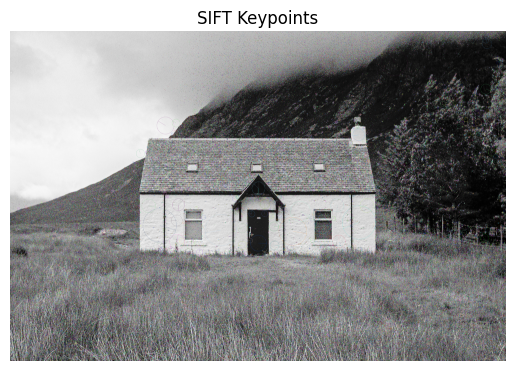

In [1]:

import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize the SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


**Expected Result:**
- A visualization of the input image with circles marking the detected keypoints and lines indicating the orientation of each keypoint.


#### Example: Using ORB in OpenCV

**What We Are Doing:**
- Using the ORB algorithm for detecting and describing features. This is computationally faster compared to SIFT.


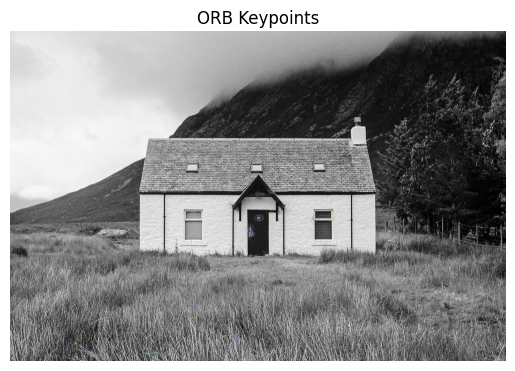

In [2]:

import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize the ORB detector
orb = cv2.ORB_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = orb.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with keypoints
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('ORB Keypoints')
plt.axis('off')
plt.show()


**Expected Result:**
- Keypoints detected by ORB visualized on the image with their orientation marked.



#### Example: Using HOG Features in OpenCV

**What We Are Doing:**
- Computing HOG features to describe the gradients and edges in the image. This technique is effective for object detection, such as pedestrian detection.


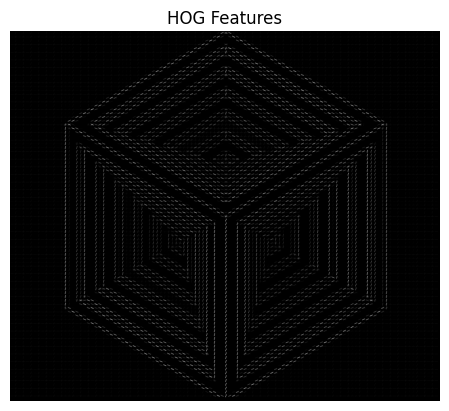

In [2]:

import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('samplehog.png', cv2.IMREAD_GRAYSCALE)

# Compute HOG features and visualization
features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                          cells_per_block=(2, 2), visualize=True)

# Display the HOG image
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Features')
plt.axis('off')
plt.show()


**Expected Result:**
- A visualization of the image's gradient structure, highlighting edges and texture patterns.


#### Example: Using FAST in OpenCV

**What We Are Doing:**
- Detecting corners using the FAST algorithm.

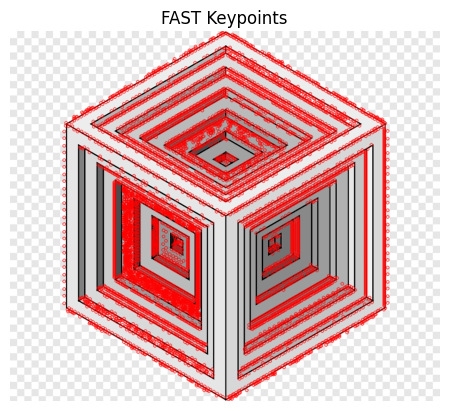

In [4]:

import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('samplehog.png', cv2.IMREAD_GRAYSCALE)

# Initialize the FAST detector
fast = cv2.FastFeatureDetector_create()

# Detect keypoints
keypoints = fast.detect(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))

# Display the image with keypoints
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('FAST Keypoints')
plt.axis('off')
plt.show()


**Expected Result:**
- Corners detected by FAST visualized on the image.



#### Example: Using BRIEF in OpenCV

**What We Are Doing:**
- Detecting keypoints and describing them using the BRIEF algorithm.


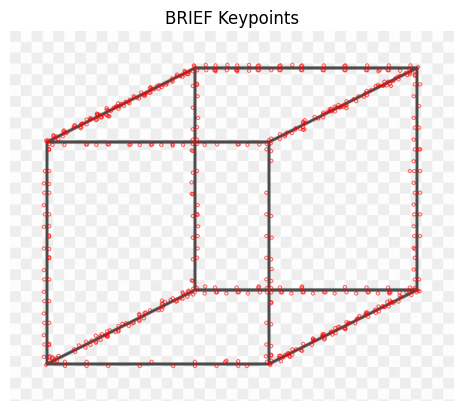

In [5]:

import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('sample1.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize the FAST detector for keypoints
fast = cv2.FastFeatureDetector_create()
keypoints = fast.detect(image, None)

# Initialize the BRIEF extractor
brief = cv2.xfeatures2d.BriefDescriptorExtractor_create()

# Compute descriptors
keypoints, descriptors = brief.compute(image, keypoints)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, color=(255, 0, 0))

# Display the image with keypoints
plt.imshow(image_with_keypoints, cmap='gray')
plt.title('BRIEF Keypoints')
plt.axis('off')
plt.show()


**Expected Result:**
- Keypoints detected and described by BRIEF visualized on the image.


#### Example: Using LBP in OpenCV

What We Are Doing:
- Extracting texture patterns using the Local Binary Patterns (LBP) method.


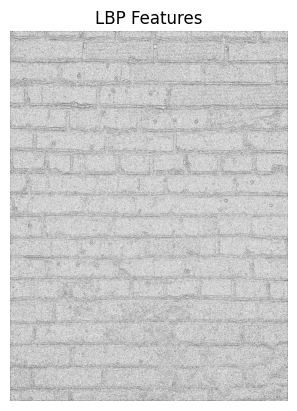

In [6]:

from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
import cv2

# Load the image
image = cv2.imread('samplewall.jpg', cv2.IMREAD_GRAYSCALE)

# Compute LBP features
radius = 3  # Radius of circle
n_points = 8 * radius  # Number of points in circle
lbp = local_binary_pattern(image, n_points, radius, method='uniform')

# Display the LBP image
plt.imshow(lbp, cmap='gray')
plt.title('LBP Features')
plt.axis('off')
plt.show()


**Expected Result:**
- An image representing the LBP patterns, highlighting texture details.


### 3. **Image Representation Techniques**

Image representation techniques organize extracted features into formats that algorithms can process efficiently.

#### 3.1 **Histograms**
- Represent the distribution of pixel intensities or gradient directions.

##### Example: Color Histogram

**What We Are Doing:**
- Computing and visualizing the distribution of pixel intensities across color channels (red, green, blue).


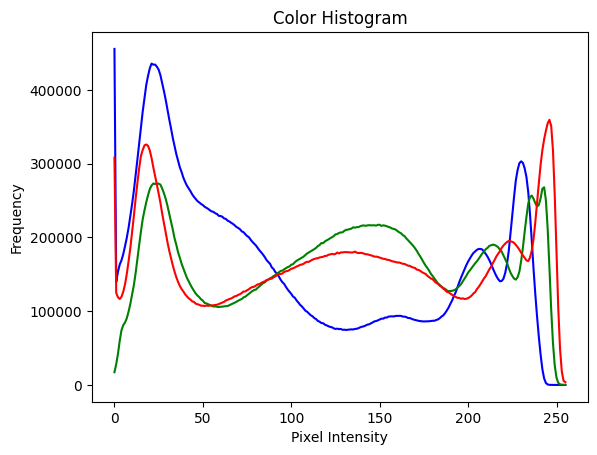

In [8]:

import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('sample.jpg')

# Compute histograms for each color channel
colors = ('b', 'g', 'r')
hist_data = {}
for i, color in enumerate(colors):
    hist_data[color] = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist_data[color], color=color)

# Display the histogram
plt.title('Color Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.show()


**Expected Result:**
- A graph showing the intensity distribution for each color channel in the image.


#### 3.2 **Bag-of-Words (BoW)**
- Represents images as collections of visual words, similar to text analysis.
- Steps:
  1. Extract features using methods like SIFT or ORB.
  2. Cluster features into visual words using k-means clustering.
  3. Represent each image as a histogram of visual words.

##### Example Code Outline:

**What We Are Doing:**
- Using k-means clustering to create visual words from image features and representing each image as a histogram of these words.


In [18]:
import cv2
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import normalize
import glob
import os

def extract_descriptors(image_path):
    """
    Extract SIFT descriptors from an image.
    """
    try:
        sift = cv2.SIFT_create()
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is None:
            print(f"Failed to load {image_path}")
            return None
        _, descriptors = sift.detectAndCompute(image, None)
        return descriptors
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

def build_histogram(image_path, kmeans):
    """
    Build a visual words histogram for a single image.
    """
    try:
        sift = cv2.SIFT_create()
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        _, descriptors = sift.detectAndCompute(image, None)
        if descriptors is not None:
            labels = kmeans.predict(descriptors)
            hist, _ = np.histogram(labels, bins=np.arange(kmeans.n_clusters + 1))
            return normalize(hist.reshape(1, -1))
        else:
            return np.zeros((1, kmeans.n_clusters))  # Empty histogram
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return np.zeros((1, kmeans.n_clusters))

def main():
    # Path to images
    image_paths = ['sample.jpg']

    if not image_paths:
        print("No images found in the specified directory.")
        return

    print(f"Found {len(image_paths)} images.")

    # Sequential descriptor extraction
    all_descriptors = []
    for image_path in image_paths:
        descriptors = extract_descriptors(image_path)
        if descriptors is not None:
            all_descriptors.append(descriptors)

    # Filter out empty descriptors
    all_descriptors = [desc for desc in all_descriptors if desc is not None and len(desc) > 0]

    if not all_descriptors:
        print("No valid descriptors found. Exiting.")
        return

    # Stack all descriptors
    all_descriptors = np.vstack(all_descriptors)
    print(f"Stacked {all_descriptors.shape[0]} descriptors.")

    # Sample a subset of descriptors for clustering
    max_descriptors = 100000  # Adjust based on memory
    if len(all_descriptors) > max_descriptors:
        sampled_descriptors = all_descriptors[np.random.choice(len(all_descriptors), max_descriptors, replace=False)]
    else:
        sampled_descriptors = all_descriptors

    # Perform MiniBatchKMeans clustering
    n_clusters = 10  # Reduced clusters for testing
    kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42, batch_size=1000)
    kmeans.fit(sampled_descriptors)
    print(f"KMeans clustering completed with {n_clusters} clusters.")

    # Sequential histogram building
    histograms = []
    for image_path in image_paths:
        hist = build_histogram(image_path, kmeans)
        histograms.append(hist)

    # Convert histograms to a NumPy array and save
    histograms = np.vstack(histograms)
    print(f"Histograms shape: {histograms.shape}")
    np.save("image_histograms.npy", histograms)
    print("Histograms saved to 'image_histograms.npy'.")

if __name__ == "__main__":
    main()


Found 1 images.
Stacked 620949 descriptors.
KMeans clustering completed with 10 clusters.
Histograms shape: (1, 10)
Histograms saved to 'image_histograms.npy'.


Loaded histograms with shape: (1, 10)


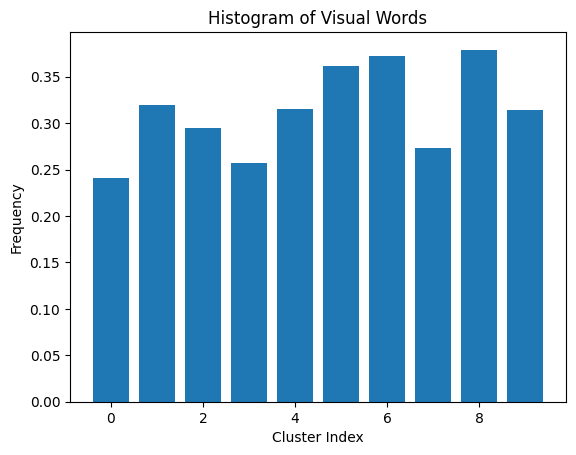

In [20]:
# Load the histograms
histograms = np.load('image_histograms.npy')
print(f"Loaded histograms with shape: {histograms.shape}")

#You can inspect or visualize the histograms:
import matplotlib.pyplot as plt

# Visualize the first histogram
plt.bar(range(histograms.shape[1]), histograms[0].flatten())
plt.title("Histogram of Visual Words")
plt.xlabel("Cluster Index")
plt.ylabel("Frequency")
plt.show()

**Expected Result:**
- A normalized histogram for each image representing the frequency of visual words.


#### 3.3 **Other Image Representation Techniques**

##### Example 1: Spatial Pyramid Matching

**What We Are Doing:**
- Dividing the image into increasingly finer grids and extracting features from each grid level to build a multi-level representation.

In [32]:

import numpy as np
import cv2
from skimage.feature import hog
from multiprocessing import Pool

# Load the image (grayscale or color)
image = cv2.imread('sample6.jpg', cv2.IMREAD_GRAYSCALE)  # Use color if required

# Define parameters
levels = [1, 2, 4]  # Number of divisions per level
min_patch_size = 8  # Minimum patch size for HOG

def process_patch(patch):
    """
    Extract HOG features from a single patch.
    """
    try:
        return hog(patch, visualize=False, channel_axis=None)  # Update for multichannel if RGB
    except ValueError as e:
        print(f"Skipping small patch: {e}")
        return None

# Divide the image into grid levels and prepare patches
patches = []
for level in levels:
    step_size = image.shape[0] // level
    if step_size < min_patch_size:
        print(f"Skipping level {level} due to small patch size.")
        continue
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            patch = image[y:y+step_size, x:x+step_size]
            if patch.shape[0] < min_patch_size or patch.shape[1] < min_patch_size:
                continue
            patches.append(patch)

# Use multiprocessing to process all patches
with Pool() as pool:
    features = pool.map(process_patch, patches)

# Remove None entries and combine features
features = [f for f in features if f is not None]
features = np.concatenate(features)

print(f"Extracted features shape: {features.shape}")



Extracted features shape: (8758854,)


**Expected Result:**
- A feature vector representing the image, incorporating spatial hierarchy.


##### Example 2: Fourier Transform Representation

**What We Are Doing:**
- Transforming the image into the frequency domain to focus on periodic patterns and textures.

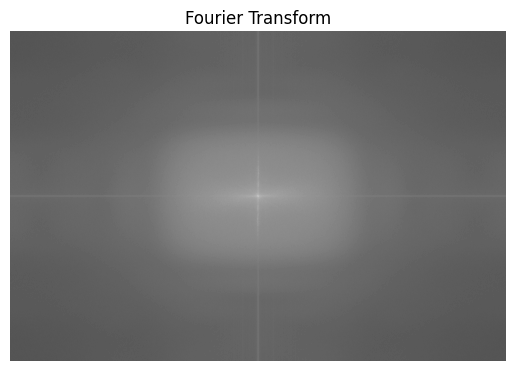

In [39]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('sample.jpg', cv2.IMREAD_GRAYSCALE)

# Compute the Fourier Transform
f_transform = np.fft.fft2(image)
f_shift = np.fft.fftshift(f_transform)
magnitude_spectrum = 20 * np.log(np.abs(f_shift))

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')
plt.show()


**Expected Result:**
- Visualization of the frequency components of the image, highlighting dominant periodic structures.


##### Example 3: Deep Feature Representations

**What We Are Doing:**
- Using a pre-trained deep learning model to extract high-level features from the image.

In [2]:

from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import get_file
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Load pre-trained VGG16 model
weights_path = get_file(
    "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
    "https://github.com/fchollet/deep-learning-models/releases/download/v0.1/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5",
)

model = VGG16(weights=weights_path, include_top=False)

# Load and preprocess the image
image = load_img('sample.jpg', target_size=(224, 224))
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = preprocess_input(image_array)

# Extract features
features = model.predict(image_array)
features = features.flatten()

print(features.shape)  # Shape of feature vector


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 817ms/step
(25088,)


**Expected Result:**
- A high-dimensional feature vector representing high-level image features learned by the VGG16 model.



## Summary

### Key Takeaways
1. Features are critical for interpreting and analyzing images.
2. Techniques like SIFT, SURF, ORB, and HOG offer robust methods for detecting and describing features.
3. OpenCV provides accessible tools to implement feature extraction.
4. Representation techniques like histograms, Bag-of-Words, and spatial pyramids bridge feature data with machine learning algorithms.
5. Methods like FAST, BRIEF, and LBP provide lightweight alternatives for specific applications.





### Additional Resources
- OpenCV Documentation: [https://docs.opencv.org/](https://docs.opencv.org/)
- Tutorials on Feature Extraction: [https://www.learnopencv.com/](https://www.learnopencv.com/)

